In [ ]:
                                #Visualizing and Forecasting of Stocks (NSE)(SBIN)

In [ ]:
#pip install numpy pandas notebook nsepy
*** NSEpy is a library to extract historical and realtime data from NSE’s website. This Library aims to keep the API very simple. ***

In [6]:
%matplotlib inline
import pandas as pd#library to handle dataframe
import numpy as np#library for scientific computing
import matplotlib.pyplot as plt#library for plots

import requests#library for request from URLs
from bs4 import BeautifulSoup as bs#library for scraping
import dtale as dt#visualization library
from dateutil.parser import parse
import investpy#library for scraping
from nsepy import get_history#library for scraping
from sqlalchemy import *#library for SQL
import warnings#library for skip warning
from datetime import date#library for handle DateTime format
from dateutil.relativedelta import *#library for handle DateTime format
import seaborn as sns
from datetime import timedelta#library for handle DateTime format
from statistics import stdev#library for find standard deviation
import scipy.stats as stats#library for statistical functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf#library for ACF & PACF plots
from statsmodels.tsa.seasonal import seasonal_decompose#library for seasonal plot
from pmdarima import auto_arima#library for finding p, q, d
from statsmodels.tsa.stattools import adfuller#library for finding d
from statsmodels.tsa.arima_model import ARIMA#library for ARIMA model
from sklearn.metrics import mean_squared_error, mean_absolute_error#library for finding error in model
import pickle#library for Pickle model into pkl file

warnings.filterwarnings('ignore')
#pip install investpy
#pip install pmdarima 

In [2]:
symbol = "SBIN"
start = date(2015, 1, 1)
end = date.today()
sbin = get_history(symbol=symbol, start=start, end=end)
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.00,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.60,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.80,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.90,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.40,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-28,SBIN,EQ,579.65,579.95,582.65,567.00,571.80,570.75,572.65,10043644,5.751516e+14,144061,3054910,0.4319
2022-10-31,SBIN,EQ,570.75,574.95,577.45,568.40,573.50,573.80,572.79,9894639,5.667560e+14,139535,3759140,0.3799
2022-11-03,SBIN,EQ,573.85,569.00,587.95,568.00,584.15,584.90,581.58,17557998,1.021139e+15,244825,5121059,0.2917


In [3]:
sbin.to_csv('sbin.csv')

<AxesSubplot:xlabel='Date'>

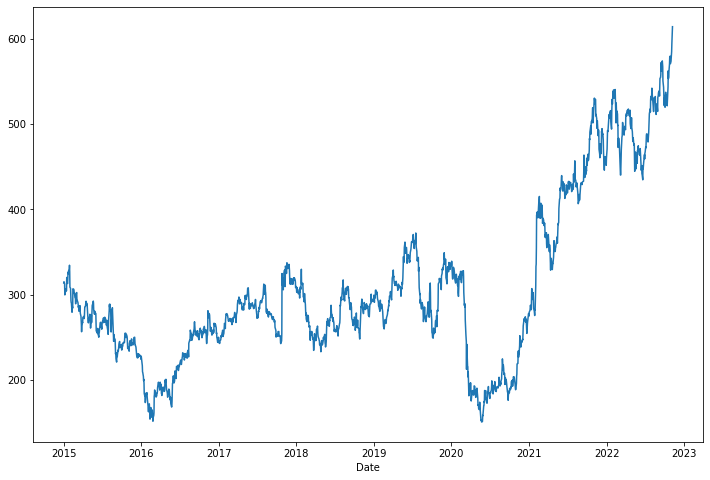

In [7]:
sbin['Close'].plot(figsize=(12,8))


In [5]:
sbin.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743


In [7]:
# To check dataset is stationary or seasonal, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals 

<Figure size 432x288 with 0 Axes>

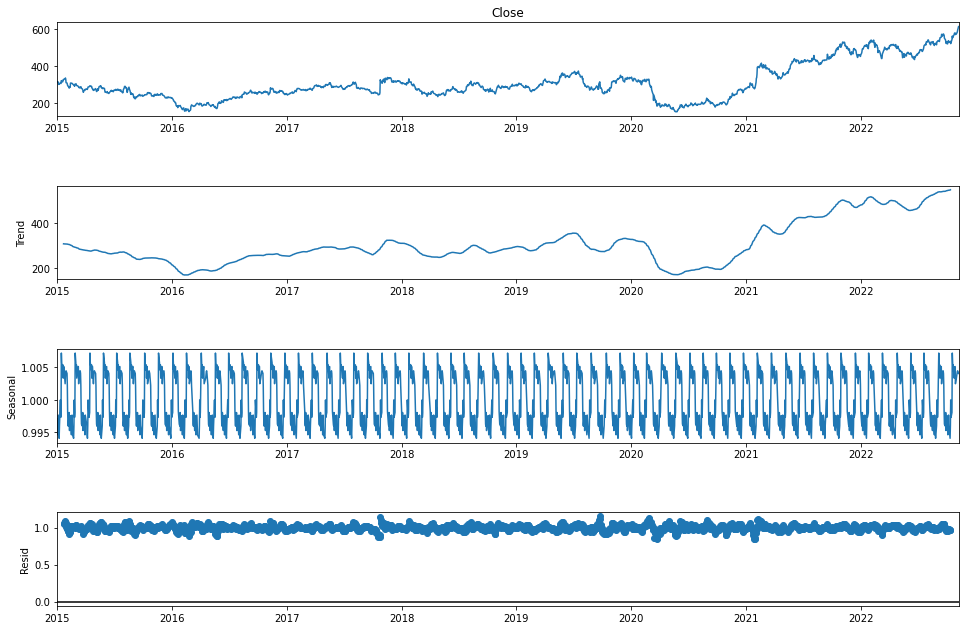

In [8]:
# using ARIMA(visualization) for Time Series Forecasting
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sbin["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

In [9]:
* 1st fig. displaying original data
*2nd fig displays Trend values(it will consider averages of prices and calculate seasonality)

SyntaxError: invalid syntax (Temp/ipykernel_15452/356881042.py, line 1)

In [ ]:
* data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting. 

In [ ]:
#Stationary time series is one whose properties do not depend on the time
#Properties
*Mean -- constant mean
*Variance -- variance should be constant with time
*Auto correlation -- correlation b/w to points depends on distance b/w 2points (lags b/w 2 points)

In [ ]:
#Checking for stationary with Dickey-fuller Test
*low Pvalue(lower than 0.05) implies series is stationary
*High PValue(greater than 0.05)implies not stationary

In [10]:
#from statsmodels.tsa.statstools import adfuller
from statsmodels.tsa.stattools import adfuller#library for finding d

In [11]:

series = sbin['Close'].values
series

array([314.  , 315.25, 312.75, ..., 584.9 , 593.95, 614.15])

In [12]:
adftest=adfuller(sbin['Close'])

In [13]:
print('Pvalue of adfuller test is:', adftest[1])

Pvalue of adfuller test is: 0.969504492294123


In [14]:
# ADF Test
result = adfuller(series, autolag='AIC')
#Extracting the values from the results:

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")


ADF Statistic: 0.153092
p-value: 0.969504
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


In [15]:
from numpy import sqrt,mean,log,diff
series1=sbin['Close'].diff()

<AxesSubplot:xlabel='Date'>

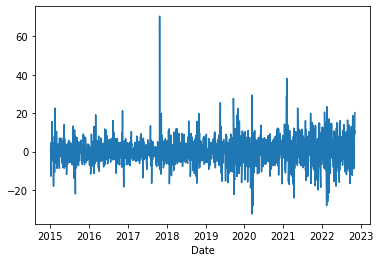

In [16]:
series1.plot()

In [17]:
adf1=adfuller(series1.dropna())
print("Pvalue of ADF test is:",adf1[1])

Pvalue of ADF test is: 6.719950430072117e-30


In [18]:
series1.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Date
2015-01-01     True
2015-01-02    False
2015-01-05    False
2015-01-06    False
2015-01-07    False
              ...  
2022-10-28    False
2022-10-31    False
2022-11-03    False
2022-11-04    False
2022-11-07    False
Name: Close, Length: 1942, dtype: bool>

In [19]:
sbin.tail(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-10-28,SBIN,EQ,579.65,579.95,582.65,567.0,571.80,570.75,572.65,10043644,5.751516e+14,144061,3054910,0.4319
2022-10-31,SBIN,EQ,570.75,574.95,577.45,568.4,573.50,573.80,572.79,9894639,5.667560e+14,139535,3759140,0.3799
2022-11-03,SBIN,EQ,573.85,569.00,587.95,568.0,584.15,584.90,581.58,17557998,1.021139e+15,244825,5121059,0.2917
2022-11-04,SBIN,EQ,584.90,586.00,596.95,580.4,595.70,593.95,587.64,25759031,1.513705e+15,302456,10018968,0.3889
2022-11-07,SBIN,EQ,593.95,613.00,622.70,607.7,613.80,614.15,615.56,44265903,2.724845e+15,470162,16413804,0.3708


In [20]:
sbin = sbin.reset_index()
sbin.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,SBIN,EQ,311.85,312.45,315.0,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
1,2015-01-02,SBIN,EQ,314.00,314.35,318.3,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2,2015-01-05,SBIN,EQ,315.25,316.25,316.8,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208


In [21]:
sbin.columns


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [22]:
sbin.sort_values(
  by="Date",
  ascending=False
 )

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1941,2022-11-07,SBIN,EQ,593.95,613.00,622.70,607.70,613.80,614.15,615.56,44265903,2.724845e+15,470162,16413804,0.3708
1940,2022-11-04,SBIN,EQ,584.90,586.00,596.95,580.40,595.70,593.95,587.64,25759031,1.513705e+15,302456,10018968,0.3889
1939,2022-11-03,SBIN,EQ,573.85,569.00,587.95,568.00,584.15,584.90,581.58,17557998,1.021139e+15,244825,5121059,0.2917
1938,2022-10-31,SBIN,EQ,570.75,574.95,577.45,568.40,573.50,573.80,572.79,9894639,5.667560e+14,139535,3759140,0.3799
1937,2022-10-28,SBIN,EQ,579.65,579.95,582.65,567.00,571.80,570.75,572.65,10043644,5.751516e+14,144061,3054910,0.4319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.40,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.90,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.80,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.60,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249


In [23]:
#Duplicate Values
print("There are", sbin.duplicated().sum(),'duplicated values in dataset')

There are 0 duplicated values in dataset


In [24]:
#Null values

sbin.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Date  Symbol  Series  Prev Close   Open   High    Low   Last  Close  \
0     False   False   False       False  False  False  False  False  False   
1     False   False   False       False  False  False  False  False  False   
2     False   False   False       False  False  False  False  False  False   
3     False   False   False       False  False  False  False  False  False   
4     False   False   False       False  False  False  False  False  False   
...     ...     ...     ...         ...    ...    ...    ...    ...    ...   
1937  False   False   False       False  False  False  False  False  False   
1938  False   False   False       False  False  False  False  False  False   
1939  False   False   False       False  False  False  False  False  False   
1940  False   False   False       False  False  False  False  False  False   
1941  False   False   False       False  False  False  False  False  False   

 

In [25]:
#exclude remaining all columns expect date and column
sbin1 = sbin[['Date','Close']]
sbin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1942 non-null   object 
 1   Close   1942 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.5+ KB


In [26]:
# Adding Saturday and sunday dates

In [27]:

sbin_data = pd.date_range(start=sbin1.Date.min(), end=sbin1.Date.max())



In [28]:
sbin_data = pd.DataFrame(sbin_data)


In [29]:
sbin_data['Price'] = ""

In [30]:
sbin_data.head(2)

,0,Price
0,2015-01-01,
1,2015-01-02,


In [31]:
for i in range(len(sbin1['Date'])):
    for j in range(len(sbin_data[0])):
        if sbin1['Date'][i] == sbin_data[0][j]: 
            sbin_data['Price'][j] = sbin1['Close'][i]

In [32]:
sbin_data.head(10)

,0,Price
0,2015-01-01,314.0
1,2015-01-02,315.25
2,2015-01-03,
3,2015-01-04,
4,2015-01-05,312.75
5,2015-01-06,299.9
6,2015-01-07,300.15
7,2015-01-08,304.85
8,2015-01-09,303.2
9,2015-01-10,


In [34]:
#replacing nan in empty places
sbin_data['Price'] = sbin_data['Price'].replace('',np.nan)
sbin_data.head(5)

,0,Price
0,2015-01-01,314.00
1,2015-01-02,315.25
2,2015-01-03,NaN
3,2015-01-04,NaN
4,2015-01-05,312.75


In [35]:
#adding previous day prices to sat and sunday
sbin_data['Price'] = sbin_data['Price'].ffill()
sbin_data.head(5)

,0,Price
0,2015-01-01,314.00
1,2015-01-02,315.25
2,2015-01-03,315.25
3,2015-01-04,315.25
4,2015-01-05,312.75


In [36]:
#Null values
sbin_data.isna().sum()

0        0
Price    0
dtype: int64

In [37]:
sbin_data.columns=['Date','Price']
sbin_data

,Date,Price
0,2015-01-01,314.00
1,2015-01-02,315.25
2,2015-01-03,315.25
3,2015-01-04,315.25
4,2015-01-05,312.75
...,...,...
2863,2022-11-03,584.90
2864,2022-11-04,593.95
2865,2022-11-05,593.95
2866,2022-11-06,593.95


In [42]:
#loading data in browser using dtale library
#d=dt.show(sbin_data)
#d.open_browser()

In [43]:
#downloading data in csv format
sbin_data.columns="Date","Price"
sbin_data.to_csv("sbin_finaldata.csv")

In [44]:
sbin_data.shape

(2868, 2)

In [45]:
sbin_data.columns

Index(['Date', 'Price'], dtype='object')

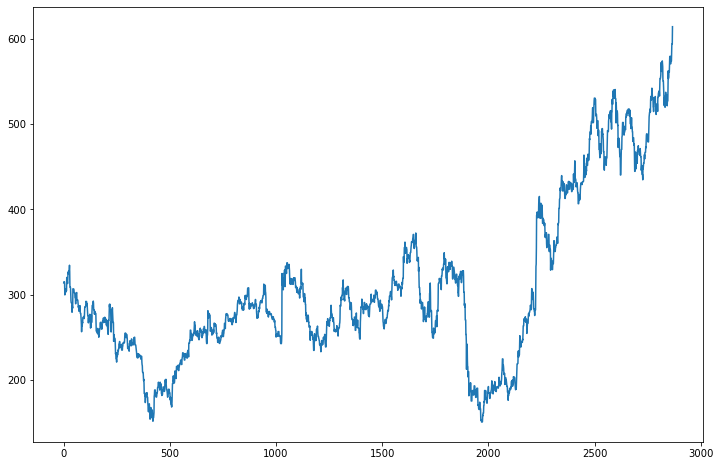

In [46]:
sbin_data['Price'].plot(figsize=(12,8))
plt.show()

In [47]:
#visualization
#pip install pandas-profiling
#pip install dtale
#pandas_profiling.version.__version__
import pandas_profiling 
from pandas_profiling import ProfileReport


2022-11-08 21:50:25,310 - INFO     - Pandas backend loaded 1.3.3
2022-11-08 21:50:25,368 - INFO     - Numpy backend loaded 1.21.2
2022-11-08 21:50:25,371 - INFO     - Pyspark backend NOT loaded
2022-11-08 21:50:25,371 - INFO     - Python backend loaded


In [48]:
profi = ProfileReport(sbin_data)
profi


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
sbin_data.describe()

,Price
count,2868.000000
mean,308.637204
std,97.402939
min,150.850000
25%,250.475000
50%,282.975000
75%,337.500000
max,614.150000


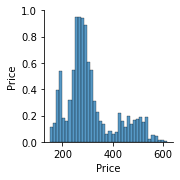

In [50]:
# pairplot 
sns.pairplot(sbin_data)
# to show
plt.show()

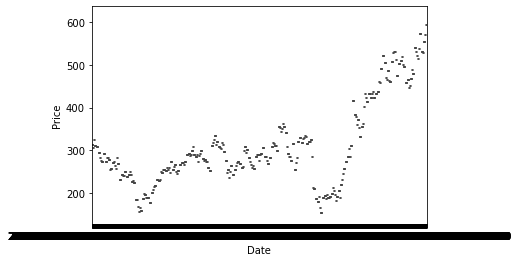

In [51]:
#box plot
sns.boxplot(x='Date',y='Price',data=sbin_data)
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

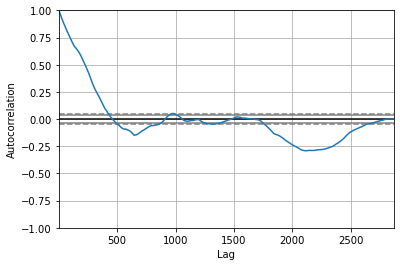

In [52]:
pd.plotting.autocorrelation_plot(sbin_data["Price"])

In [53]:
#In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5.

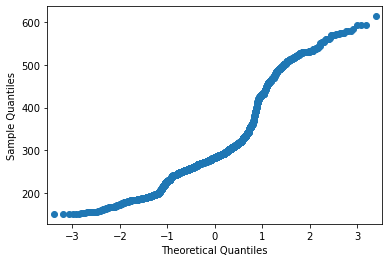

In [54]:
from statsmodels.graphics.gofplots import qqplot

qqplot(sbin_data['Price'])
plt.show()

In [55]:
sbin_data.shape

(2868, 2)

In [56]:
import os
os.getcwd()

'C:\\Users\\Admin\\iit proj'

In [57]:
#highest price
sbin_data['Price'].nlargest(n=10)


2867    614.15
2864    593.95
2865    593.95
2866    593.95
2863    584.90
2856    579.65
2854    578.55
2855    578.55
2819    574.05
2860    573.80
Name: Price, dtype: float64

In [58]:
#lowest price
sbin_data['Price'].nsmallest(n=10)

1968    150.85
1969    150.85
1970    150.85
1971    150.85
1972    151.40
420     151.80
1967    151.95
1965    152.80
1966    153.40
406     154.25
Name: Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

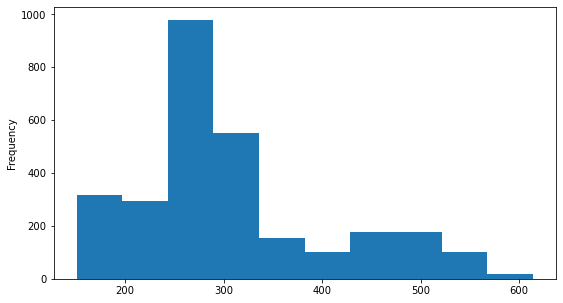

In [59]:
plt.figure(figsize = (9, 5))
sbin_data['Price'].plot(kind ="hist")


<AxesSubplot:>

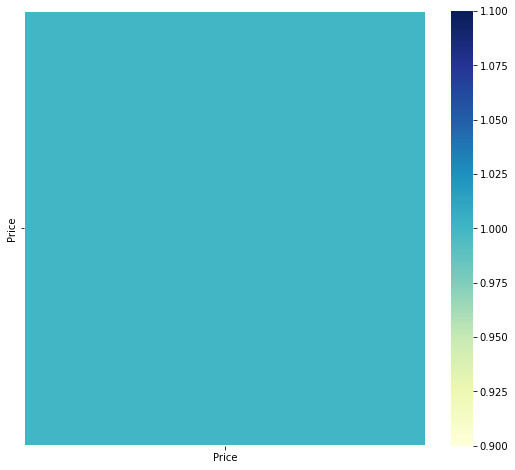

In [60]:
corrmat = sbin_data.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


In [61]:
########################ARIMA{Autoregressive Integrated Moving Average}###################################
*Time Series Forecasting means analyzing and modeling time-series data to make future decisions.
*Arima is one of the statistical method for forecasting Time series data


SyntaxError: invalid syntax (Temp/ipykernel_15452/2557602144.py, line 2)

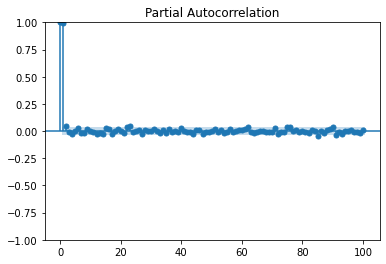

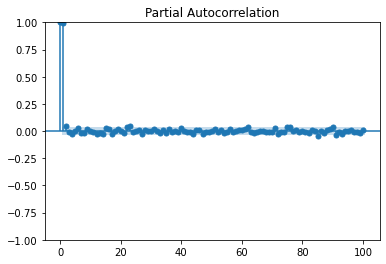

In [62]:
#Arima
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(sbin_data["Price"], lags = 100)

In [66]:
*ARIMA models have three parameters like ARIMA(p, d, q).
*p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
*d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
*q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

SyntaxError: invalid syntax (Temp/ipykernel_15452/1320954938.py, line 1)

In [67]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sbin_data["Price"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2868
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -8918.929
Date:                Tue, 08 Nov 2022   AIC                          17853.858
Time:                        21:53:43   BIC                          17901.546
Sample:                             0   HQIC                         17871.051
                               - 2868                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3236      0.830      0.390      0.697      -1.303       1.950
ar.L2          0.4548      0.571      0.796      0.426      -0.665       1.575
ar.L3          0.0532      0.029      1.850      0.0

In [68]:
predictions = fitted.predict()
print(predictions)

0         0.000000
1       313.999754
2       315.216970
3       315.263195
4       315.306308
           ...    
2863    573.966490
2864    584.740594
2865    593.856663
2866    594.623270
2867    594.676464
Name: predicted_mean, Length: 2868, dtype: float64


In [69]:
#SARIMA stands for Seasonal-ARIMA and it includes seasonality contribution to the forecast. The importance of seasonality is quite evident and ARIMA fails to encapsulate that information implicitly.

In [70]:
#sarima
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(sbin_data['Price'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 2868
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -8904.124
Date:                            Tue, 08 Nov 2022   AIC                          17838.248
Time:                                    21:56:42   BIC                          17927.601
Sample:                                         0   HQIC                         17870.469
                                           - 2868                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8062      2.126     -0.379      0.705      -4.973       3.361
ar.L2         -0.3088      1.206   

In [71]:
predictions = model.predict(len(sbin_data), len(sbin_data)+10)
print(predictions)

2868    613.837972
2869    613.231356
2870    615.062595
2871    615.673296
2872    616.150422
2873    615.985802
2874    615.540617
2875    616.433601
2876    617.053005
2877    616.089526
2878    617.134454
Name: predicted_mean, dtype: float64


<AxesSubplot:>

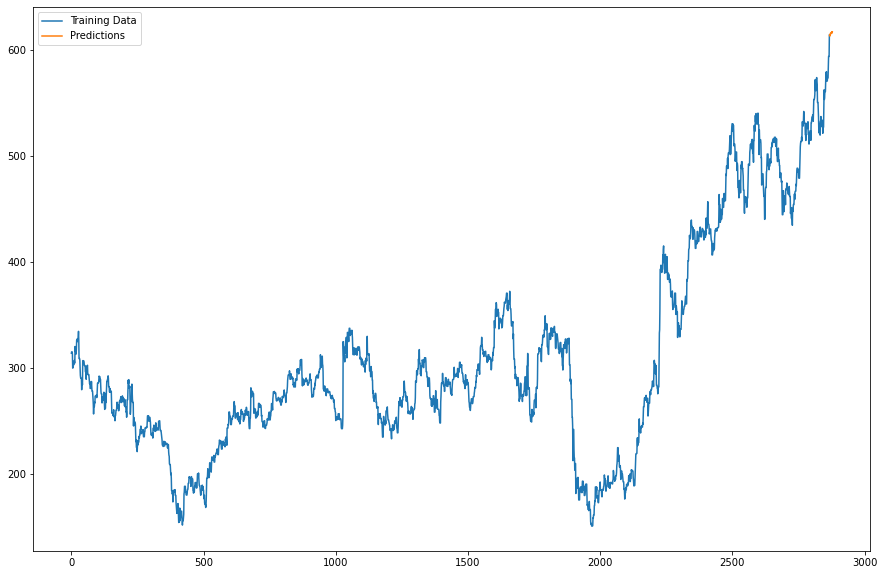

In [72]:
sbin_data["Price"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [ ]:
#Conclusion:
    *Predicted next 10 days prices using ARIMA(SARIMA) Model

In [73]:
#############LSTM#############################

In [ ]:
#LSTM stands for Long-Short Term Memory. LSTM is a type of recurrent neural network but is better than traditional recurrent neural networks in terms of memory. Having a good hold over memorizing certain patterns LSTMs perform fairly better.

In [74]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [75]:
sbin_data1=sbin_data.reset_index()['Price']


In [76]:
sbin_data1.shape


(2868,)

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
sbin_data1=scaler.fit_transform(np.array(sbin_data1).reshape(-1,1))

In [78]:
print(sbin_data1)

[[0.35214764]
 [0.35484567]
 [0.35484567]
 ...
 [0.95639974]
 [0.95639974]
 [1.        ]]


In [79]:
##splitting dataset into train and test split
training_size=int(len(sbin_data1)*0.65)
test_size=len(sbin_data1)-training_size
train_data,test_data=sbin_data1[0:training_size,:],sbin_data1[training_size:len(sbin_data1),:1]

In [80]:
training_size,test_size

(1864, 1004)

In [81]:
train_data

array([[0.35214764],
       [0.35484567],
       [0.35484567],
       ...,
       [0.34567235],
       [0.36930714],
       [0.36628534]])

In [82]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [83]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 300
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [84]:
print(X_train.shape), print(y_train.shape)

(1563, 300)
(1563,)


(None, None)

In [85]:
print(X_test.shape), print(ytest.shape)

(703, 300)
(703,)


(None, None)

In [86]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [87]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [88]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(300,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [89]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 300, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 300, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 14s 417ms/step - loss: 0.0171 - val_loss: 0.0291
Epoch 2/100
25/25 [==============================] - 10s 383ms/step - loss: 0.0024 - val_loss: 0.0156
Epoch 3/100
25/25 [==============================] - 10s 400ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 4/100
25/25 [==============================] - 11s 457ms/step - loss: 8.4061e-04 - val_loss: 0.0022
Epoch 5/100
25/25 [==============================] - 11s 451ms/step - loss: 7.9123e-04 - val_loss: 0.0020
Epoch 6/100
25/25 [==============================] - 11s 450ms/step - loss: 7.6000e-04 - val_loss: 0.0024
Epoch 7/100
25/25 [==============================] - 11s 456ms/step - loss: 7.2492e-04 - val_loss: 0.0020
Epoch 8/100
25/25 [==============================] - 12s 477ms/step - loss: 6.7413e-04 - val_loss: 0.0022
Epoch 9/100
25/25 [==============================] - 12s 494ms/step - loss: 6.2510e-04 - val_loss: 0.0022
Epoch 10/100
25/25 [==============================] - 12s 

In [91]:
import tensorflow as tf

In [92]:
tf.__version__

'2.7.0'

In [93]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [94]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [95]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

274.87385694175975

In [96]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

451.35118367292546

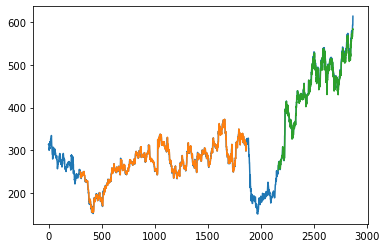

In [97]:
### Plotting 
# shift train predictions for plotting
look_back=300
trainPredictPlot = numpy.empty_like(sbin_data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(sbin_data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(sbin_data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(sbin_data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [98]:
len(test_data)

1004

In [99]:
x_input=test_data[703:].reshape(1,-1)
x_input.shape

(1, 301)

In [100]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [101]:
temp_input

[0.7664580185624865,
 0.7757392618173968,
 0.7781135333477229,
 0.7716382473559249,
 0.7716382473559249,
 0.7716382473559249,
 0.7838333693071444,
 0.7682926829268293,
 0.7877185409022232,
 0.7782214547809194,
 0.7594431254047054,
 0.7594431254047054,
 0.7594431254047054,
 0.740988560328081,
 0.7852363479387006,
 0.7852363479387006,
 0.8161018778329376,
 0.804230520181308,
 0.804230520181308,
 0.804230520181308,
 0.8362831858407078,
 0.823332613857112,
 0.839520828836607,
 0.8401683574357868,
 0.8190157565292466,
 0.8190157565292466,
 0.8190157565292466,
 0.825383121087848,
 0.821282106626376,
 0.8296999784157133,
 0.8411396503345563,
 0.8175048564644938,
 0.8175048564644938,
 0.8175048564644938,
 0.7566371681415929,
 0.807144398877617,
 0.7896611266997626,
 0.7815670192100153,
 0.7866393265702567,
 0.7866393265702567,
 0.7866393265702567,
 0.7791927476796892,
 0.7501618821497948,
 0.7508094107489747,
 0.694582344053529,
 0.7168141592920354,
 0.7168141592920354,
 0.7168141592920354,
 0

In [106]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=300
i=0
while(i<30):
    
    if(len(temp_input)>300):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.81750486 0.81750486 0.81750486 0.75663717 0.8071444  0.78966113
 0.78156702 0.78663933 0.78663933 0.78663933 0.77919275 0.75016188
 0.75080941 0.69458234 0.71681416 0.71681416 0.71681416 0.71735377
 0.71735377 0.69803583 0.68325059 0.67148716 0.67148716 0.67148716
 0.62475718 0.62475718 0.64936326 0.68605655 0.68961796 0.68961796
 0.68961796 0.7215627  0.7230736  0.73796676 0.75771638 0.75771638
 0.75771638 0.75771638 0.73332614 0.74001727 0.73343406 0.72577164
 0.73354198 0.73354198 0.73354198 0.7482193  0.74282322 0.74131232
 0.7396935  0.77131448 0.77131448 0.77131448 0.78037988 0.7739046
 0.78372545 0.78588388 0.78836607 0.78836607 0.78836607 0.78577596
 0.78135118 0.79181956 0.79181956 0.79181956 0.79181956 0.79181956
 0.77412044 0.77908483 0.77368875 0.78879776 0.75491043 0.75491043
 0.75491043 0.74228362 0.76548673 0.74767969 0.76980358 0.74562918
 0.74562918 0.74562918 0.73418951 0.73418951 0.70969134 0.71044679
 0.71897259 0.71897259 0.71897259 0.70159724 0.7000

In [107]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [108]:
len(sbin_data1)

2868

In [ ]:
#Plotting Forecasted values for next 30 days

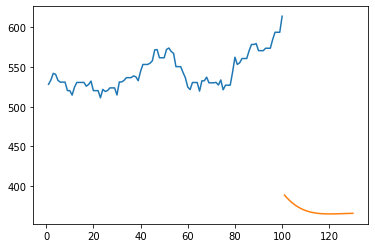

In [110]:
plt.plot(day_new,scaler.inverse_transform(sbin_data1[2768:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

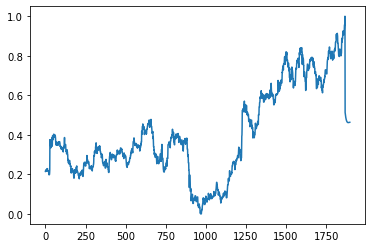

In [111]:
df3=sbin_data1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [112]:
df3=scaler.inverse_transform(sbin_data1).tolist()

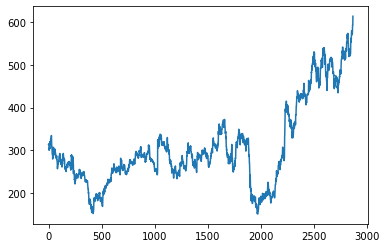

Executing shutdown due to inactivity...


2022-11-08 22:47:57,544 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-11-08 22:48:10,292 - INFO     - Executing shutdown...


In [113]:
plt.plot(df3)

In [ ]:
###Conclusion
    * Predicted prices for next 30 days using LSTM model

In [ ]:
                                        #Conclusion
    *From LSTM and ARIMA models ARIMA model provided good accuracy, So finalizing ARIMA model for forecasting sbin stocks
